## Installing required dependencies

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 12.8 MB/s 


In [ ]:
! pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing the necessary packages
import requests
from bs4 import BeautifulSoup

## Retrieving Articles from URL

In [ ]:
url='https://www.aljazeera.com/where/mozambique/'

In [ ]:
r1 = requests.get(url)
coverpage = r1.content

In [ ]:
soup1 = BeautifulSoup(coverpage, "html.parser")

In [ ]:
number_of_articles = 10
coverpage_news = soup1.find_all('h3', class_='gc__title', limit=number_of_articles)

In [ ]:
news_titles=[article.get_text() for article in coverpage_news]

In [ ]:
news_contents = []
list_links = [link.find('a')['href'] for link in coverpage_news]

for link in list_links:
  article = requests.get('http://www.aljazeera.com'+link)
  article_content = article.content
  soup_article = BeautifulSoup(article_content, 'html5lib')
  body = soup_article.find_all('div', class_='wysiwyg--all-content')
  x = body[0].find_all('p')
  text=''.join([p.get_text() for p in x])
  news_contents.append(text)

##Converting to Json file

In [ ]:
dict1={}
for i in range(number_of_articles):
  data={}
  data['title']=news_titles[i]
  data['article']=news_contents[i]
  dict1[i]=data

In [ ]:
import json
with open('json_data.json', 'w') as outfile:
    json.dump(dict1, outfile)

##Running Sentiment Analysis

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def process(text):
  text_tokens = word_tokenize(text)
  tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
  filtered_sentence = (" ").join(tokens_without_sw)
  return filtered_sentence.lower()

In [ ]:
def sentiment_scores(sentence):
  sid_obj = SentimentIntensityAnalyzer()
  filtered_sentence=process(sentence)
  sentiment_dict = sid_obj.polarity_scores(filtered_sentence)
  pos_txt=''
  neg_txt=''
  neu_txt=''
  cat=''
  if sentiment_dict['compound'] >= 0.05 :
      pos_txt+=filtered_sentence
      cat= "Positive"
  elif sentiment_dict['compound'] <= - 0.05 :
      neg_txt+=filtered_sentence
      cat= "Negative"
  else :
      neu_txt+=filtered_sentence
      cat= "Neutral"
  return cat, pos_txt, neg_txt, neu_txt

In [ ]:
# Data can be directly input to Vader without any preprocessing as the library takes care of all the preprocessing.
scores=[]
pos=''
neg=''
neu=''
for news in news_contents:
  score, pos_txt, neg_txt, neu_txt=sentiment_scores(news)
  scores.append(score)
  pos+=pos_txt
  neg+=neg_txt
  neu+=neu_txt

In [ ]:
scores

['Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative']

In [ ]:
news_contents[0]

'Heavy rains in South Africa have forced hundreds of people to flee their homes on the east coast, according to officials, only a month after the worst floods in living memory killed more than 400.\nThe floods over the weekend hit infrastructure, roads, bridges and damaged buildings, mainly in the port city of Durban, the capital of KwaZulu-Natal province and home to some 3.9 million people.“Some areas are inaccessible and have become islands at this stage,” KwaZulu-Natal Premier Sihle Zikalala said during a news conference on Sunday.\nNo fatalities were immediately recorded, but Zikalala added: “We are yet to receive a full comprehensive report on the impact of these latest heavy rains, but as reports come in a worrying picture is however emerging.”\nIn April, torrential rain led to floods, landslides and the death of 435 people in KwaZulu-Natal and authorities said survivors were left without drinking water for nearly two weeks. Repairs are still ongoing after the floods caused damag

## Visualization of Results

In [ ]:
import plotly.graph_objects as go

labels = ['Positive','Negative','Neutral']
values = [scores.count('Positive'), scores.count('Negative'), scores.count('Neutral')]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

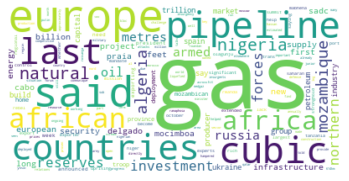

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(pos)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

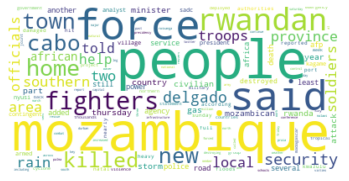

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(neg)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()